## Load train dataset

In [6]:
import pandas as pd # data processing, csv load, dataframes
%run -i 'load/train.py' #run script for loading

## Vizualisation on train dataset

In [2]:
training_set.sample(5)

,object_id,mjd,passband,flux,flux_err,detected
459992,231062,60621.2934,4,-3.326413,3.595114,0
1228275,96761640,59819.2722,0,-7.211174,10.767674,0
1002145,56479755,59864.2969,4,18.523453,14.678795,0
1108823,75836645,60597.3547,3,109.084099,7.872549,1
775153,15514596,59789.0907,2,3.326785,4.769137,0


In [3]:
training_set_metadata.sample(5)

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
1177,197650,53.261719,-27.615883,223.280041,-54.281374,1,0.1203,0.1012,0.0186,38.3425,0.006,62
3828,39188117,29.882812,-36.981888,251.591620,-72.572845,0,0.5029,2.0542,0.8093,46.0282,0.014,90
4685,59237112,74.355469,-4.181528,203.084814,-27.183293,0,0.1624,2.6391,1.1519,46.6903,0.039,42
4867,63387962,154.863281,-15.094787,257.167081,33.946005,0,0.3902,0.3379,0.6292,41.2551,0.076,62
7569,124687561,59.414062,-8.536388,199.009502,-42.292614,0,0.0766,0.0872,0.0276,37.9984,0.052,64


In [4]:
unique_targets = training_set_metadata.target.unique()
print ("There are {} unique targets.".format(len(unique_targets)))
print (unique_targets)

There are 14 unique targets.
[92 88 42 90 65 16 67 95 62 15 52  6 64 53]


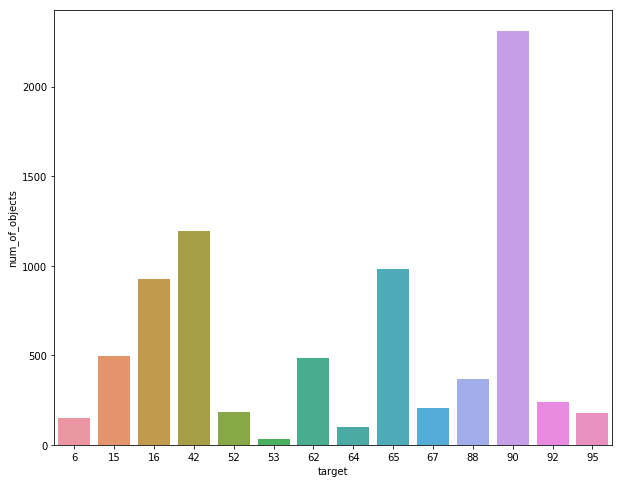

In [4]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

objects_per_target = pd.DataFrame(training_set_metadata.groupby("target", as_index = False)["object_id"].count())
objects_per_target = objects_per_target.rename(columns = {"object_id": "num_of_objects"})
fig = plt.figure(figsize=(10,8))
sb.barplot(x =objects_per_target.target, y = objects_per_target.num_of_objects);

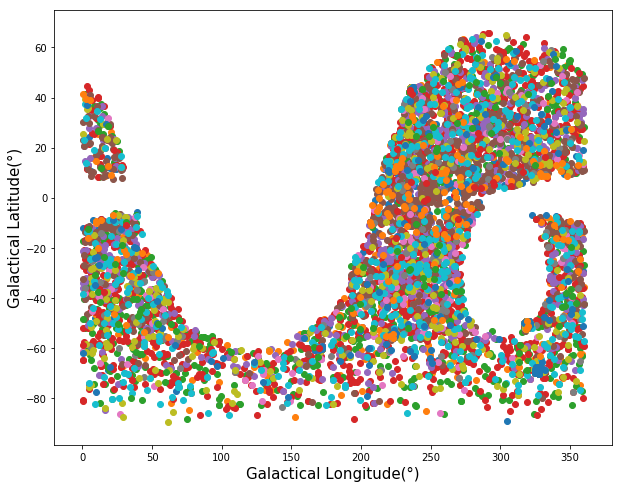

In [6]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
for class_target in unique_targets:
    class_used = training_set_metadata[training_set_metadata.target == class_target]
    ax.scatter(x = class_used.gal_l, y = class_used.gal_b, alpha = 1)
plt.xlabel("Galactical Longitude(°)", fontsize = 15)
plt.ylabel("Galactical Latitude(°)", fontsize = 15);

## Basic try

In [5]:
training_set['object_id'].value_counts()

104397       352
7409         352
248547       352
238409       352
52370        352
183143       352
167910       352
68667        352
334749       352
273339       352
77340        352
95127        352
84758        352
53249        352
207706       352
95455        352
200148       352
71890        352
39846        352
24592        352
83634        352
226891       352
57263        352
199801       352
329277       352
242508       352
267192       352
49389        352
129861       352
180288       352
            ... 
53925325      66
23623153      66
72733015      65
73580588      64
77033002      64
36405978      63
127521600     63
13698236      63
95810605      63
65333415      62
18113712      62
61444402      62
121069321     62
51496907      61
80517263      61
29586650      60
43694559      60
109245931     59
64777436      58
47900292      58
89007601      58
42585719      57
45228742      56
110850947     56
100413487     55
50118260      55
68643457      52
119353712     

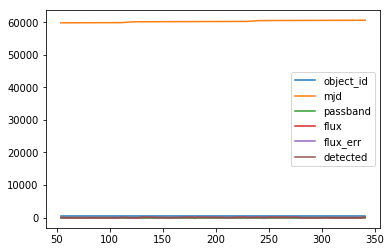

In [13]:
training_set[(training_set['passband'] == 0) & (training_set['object_id'] == 615)]